# Pupularity Bases Recommendation System
In this project, I will prepare **Top 10 movies** based on the *user ratings* and *view count*.

In [1]:
import numpy as np
import pandas as pd

In [2]:
movie_names = pd.read_csv('movies.csv')
movie_names.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movie_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9125 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


In [4]:
rating_data = pd.read_csv('ratings.csv')
rating_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### Merge both datasets using *pd.merge* on *movieId*

In [6]:
movie_data = pd.merge(rating_data, movie_names, on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


## **Criteria** for Popularity Based Recommendation Systems
The Criteria based on:
1. Movies with highest rating
2. Number of views

### Average Ratings of movies
Calculate the average of each movies' ratings.

I group movie data by *title* and calculate the mean. Since we have a separate csv file for movie names, it is safe to perform *groupby* using *title* column because we know there are no any duplicates with subtle name changes.

In [28]:
average_ratings = movie_data.groupby('title')['rating'].mean()
average_ratings

title
"Great Performances" Cats (1998)             1.750000
$9.99 (2008)                                 3.833333
'Hellboy': The Seeds of Creation (2004)      2.000000
'Neath the Arizona Skies (1934)              0.500000
'Round Midnight (1986)                       2.250000
                                               ...   
xXx (2002)                                   2.478261
xXx: State of the Union (2005)               1.000000
¡Three Amigos! (1986)                        3.258065
À nous la liberté (Freedom for Us) (1931)    4.500000
İtirazım Var (2014)                          3.500000
Name: rating, Length: 9064, dtype: float64

Sort ratings by descending order

average_ratings.sort_values(ascending=False)

## Rating count
*Rating count* is very important when it comes to **Popularity** based recommendation systems.

Because popular movies must be watched and rated high by majority of the people. We need to consider the rating count to observe that information.

In [31]:
rating_count = movie_data.groupby('title')['rating'].count().sort_values(ascending=False)
rating_count

title
Forrest Gump (1994)                                   341
Pulp Fiction (1994)                                   324
Shawshank Redemption, The (1994)                      311
Silence of the Lambs, The (1991)                      304
Star Wars: Episode IV - A New Hope (1977)             291
                                                     ... 
Robin Williams: Weapons of Self Destruction (2009)      1
Good German, The (2006)                                 1
Good Earth, The (1937)                                  1
Robot Overlords (2014)                                  1
İtirazım Var (2014)                                     1
Name: rating, Length: 9064, dtype: int64

## Prepare a *DataFrame* using *average* and *count*  values

In [33]:
rating_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
rating_mean_count

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000
...,...
xXx (2002),2.478261
xXx: State of the Union (2005),1.000000
¡Three Amigos! (1986),3.258065


### Now we add *rating counts* into the DataFrame

In [34]:
rating_mean_count['rating_counts'] = movie_data.groupby('title')['rating'].count()
rating_mean_count

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2
...,...,...
xXx (2002),2.478261,23
xXx: State of the Union (2005),1.000000,1
¡Three Amigos! (1986),3.258065,31


In [35]:
rating_mean_count.dtypes

rating           float64
rating_counts      int64
dtype: object

In [36]:
rating_mean_count['rating'] = round(rating_mean_count['rating'], 1)

In [37]:
rating_mean_count

,rating,rating_counts
title,,
"""Great Performances"" Cats (1998)",1.8,2
$9.99 (2008),3.8,3
'Hellboy': The Seeds of Creation (2004),2.0,1
'Neath the Arizona Skies (1934),0.5,1
'Round Midnight (1986),2.2,2
...,...,...
xXx (2002),2.5,23
xXx: State of the Union (2005),1.0,1
¡Three Amigos! (1986),3.3,31


### Apply our creteria we set earlier to decide a movie is popular or not

In [40]:
rating_threshold = 4
view_count_threshold = 100

popular_movies = rating_mean_count[(rating_mean_count['rating'] > rating_threshold) & (rating_mean_count['rating_counts'] > view_count_threshold)]
popular_movies.head()

,rating,rating_counts
title,,
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",4.1,125
American Beauty (1999),4.2,220
Apocalypse Now (1979),4.1,112
Casablanca (1942),4.2,117
"Dark Knight, The (2008)",4.2,121


## Top 10 movies all the time

In [41]:
popular_movies.sort_values(by='rating', ascending=False).head(10)

,rating,rating_counts
title,,
"Shawshank Redemption, The (1994)",4.5,311
"Godfather, The (1972)",4.5,200
"Usual Suspects, The (1995)",4.4,201
"Godfather: Part II, The (1974)",4.4,135
Fargo (1996),4.3,224
Pulp Fiction (1994),4.3,324
One Flew Over the Cuckoo's Nest (1975),4.3,144
Schindler's List (1993),4.3,244
Fight Club (1999),4.2,202


### Above result will show **Netflix** Recommendations as follows.

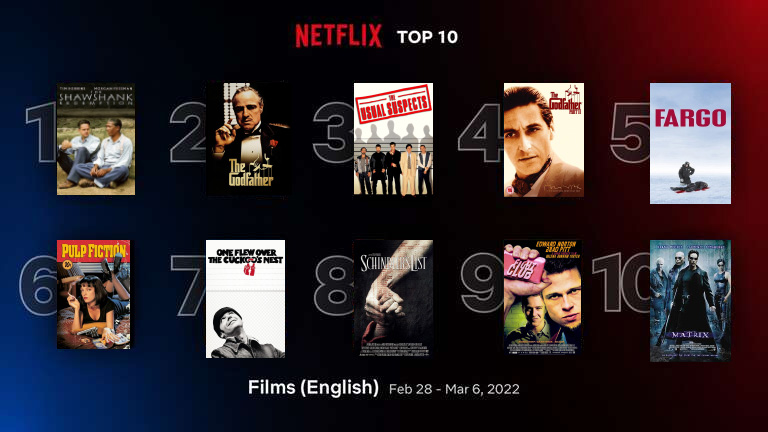

#below is another example of 2023 top 10 just for reference.

![](top10-films-english.webp)